In [10]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from utils import make_grid

# For all GPs we  create a sampling and variance pipeline

In [3]:
model_name = "dfGPdfNN"
model_name = "dfGP"
results_dir = "results/"
sim_name = "curve_dtl"

path_mean = results_dir + model_name + "/" + sim_name + "_" + model_name + "_test_mean_predictions.pt"
path_covar = results_dir + model_name + "/" + sim_name + "_" + model_name + "_test_covar_predictions.pt"

mean_predictions = torch.load(path_mean, weights_only = False)
covar_predictions = torch.load(path_covar, weights_only = False)

# Extract n_side
n_side = int(np.sqrt(mean_predictions.shape[0]))
# make grid with imported function
x_grid, x_grid_long = make_grid(n_side)

# mean_predictions_flat = torch.concat((mean_predictions[:, 0], mean_predictions[:, 1]), dim = 0)
mean_predictions_flat = mean_predictions.reshape(-1)
print("Mean predictions shape:", mean_predictions.shape)
print("Mean predictions flat shape:", mean_predictions_flat.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'results/dfGP/curve_dtl_dfGP_test_mean_predictions.pt'

W have N = 400 points (20×20), each with 2 output dimensions (e.g., u and v components of a vector field).

[400 × 2, 400 × 2] = [800, 800]

The covariance matrix encodes:

- how points in space are correlated,
- how vector components within a point are correlated (e.g., cov(u, v) at the same location)
- and how components across different points are correlated (e.g., cov(u₁, v₂))

In [ ]:
# Example: Covariance matrix is shape [800, 800] (replace with your actual covariance matrix)
covariance_matrix = covar_predictions.cpu()  # Replace with actual full covariance matrix
covariance_matrix = covariance_matrix @ covariance_matrix.T  # Ensures it's symmetric and positive definite
epsilon = 1e-6
covariance_matrix += epsilon * torch.eye(800)

# Step 2: Define the MultivariateNormal distribution
mvn = torch.distributions.MultivariateNormal(loc = mean_predictions_flat.cpu(), covariance_matrix = covariance_matrix.cpu())

# Step 3: Sample from the distribution
sample_flat = mvn.sample()  # Shape [800]

# Step 4: Reshape the sample back to the original shape [20, 20, 2]
sample = sample_flat.view(20, 20, 2)

In [ ]:
def draw_n_samples(mean, covariance, n_samples = 1):
    """
    Draw n_samples from a multivariate normal distribution with given mean and (full) covariance matrix.

    Input:
        mean: Mean vector of shape (n_side * n_side, 2) aka long format
        covariance: Covariance matrix of shape (n_side * n_side * 2, n_side * n_side * 2)
        n_samples: Number of samples to draw. Default is 1.
    Output:
        samples: Tensor of shape (n_samples, n_side, n_side, 2) containing the drawn samples.
    """
    n_side = int(np.sqrt(mean.shape[0]))
    mean_flat = mean.reshape(-1)

    covariance_matrix = covariance @ covariance.T  # Ensures this matrix symmetric and positive definite
    epsilon = 1e-6
    covariance_matrix += epsilon * torch.eye(800)
    
    samples = torch.empty((n_samples, n_side, n_side, 2))
    mvn = torch.distributions.MultivariateNormal(loc = mean_flat.cpu(), covariance_matrix = covariance_matrix.cpu())

    for i in range(n_samples):
        sample = mvn.sample().reshape(n_side, n_side, 2).unsqueeze(0)
        samples[i] = sample

    return samples

In [ ]:
out = draw_n_samples(mean_predictions, covariance_matrix, n_samples = 5)
out.shape

torch.Size([5, 20, 20, 2])

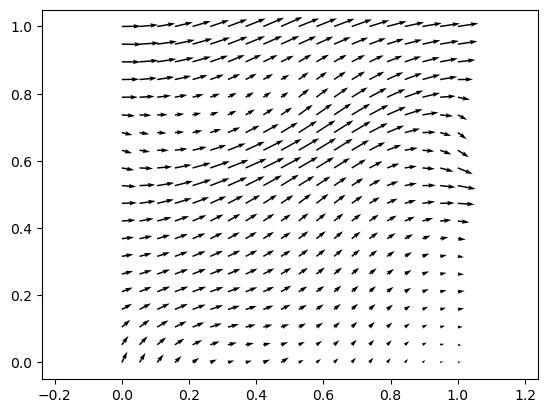

In [ ]:
import matplotlib.pyplot as plt 

# Step 3: Sample from the distribution
sample_flat = mvn.sample()  # Shape [800]

# Step 4: Reshape the sample back to the original shape [20, 20, 2]
sample = sample_flat.view(20, 20, 2)

plt.quiver(
    x_grid[:, :, 0], 
    x_grid[:, :, 1], 
    sample[:, :, 0], 
    sample[:, :, 1], 
)

plt.axis("equal")
plt.show()

In [ ]:
var = torch.diag(covariance_matrix)[:400].reshape(20, 20) + torch.diag(covariance_matrix)[400:].reshape(20, 20)

In [ ]:
torch.set_printoptions(sci_mode = False)
var.max()

tensor(0.2600, grad_fn=<MaxBackward1>)

In [ ]:
torch.square(torch.tensor(0.05))

tensor(0.0025)

In [ ]:
var

tensor([[    0.0045,     0.0017,     0.0005,     0.0001,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0005,     0.0026,     0.0088,     0.0228,     0.0494,
             0.0926,     0.1544],
        [    0.0019,     0.0006,     0.0001,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0005,     0.0024,     0.0073,
             0.0178,     0.0364],
        [    0.0008,     0.0002,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0001,     0.0001,     0.0000,     0.0000,
             0.0003,     0.0017],
        [    0.0003,     0.0001,     0.0000,     0.0000,     0.0000,     0.0000,
             0.0000,     0.0000,     0.0000,     0.0000,     0.0000,     0.0000,
       

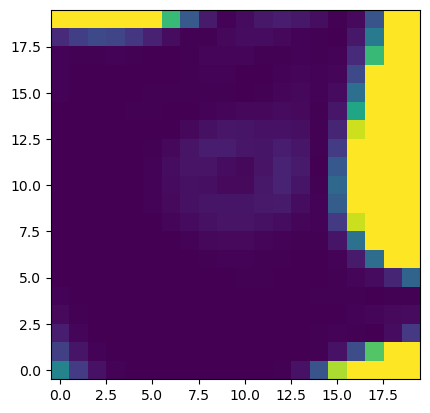

In [ ]:
plt.imshow(var.detach(), vmax = 0.01, origin = "lower")

In [4]:
div_field = torch.load("results/dfGP/edge_dfGP_test_prediction_divergence_field.pt", weights_only = False)

In [ ]:
div_field.max()


tensor(0.0005, device='cuda:0', grad_fn=<MaxBackward1>)

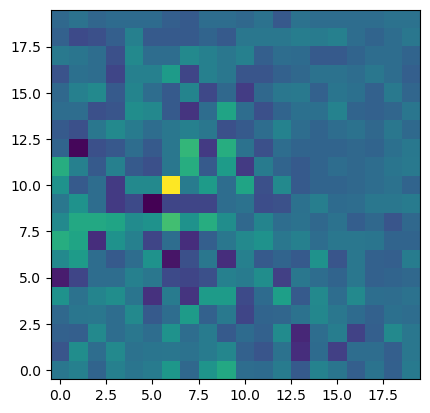

In [11]:
plt.imshow(div_field.detach().cpu().reshape(20, 20), origin = "lower")